In [2]:
# Electricity Load Forecasting - Exploratory Data Analysis (EDA)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "data/train_dataframes.xlsx"  # Change this to your file path
xls = pd.ExcelFile(file_path)

# Load a subset of sheets (first 5) for efficient analysis
selected_sheets = xls.sheet_names[:5]
df_list = [pd.read_excel(xls, sheet_name=sheet) for sheet in selected_sheets]
df = pd.concat(df_list, ignore_index=True)

# Convert datetime column to proper format
df["datetime"] = pd.to_datetime(df["datetime"])

# Display first few rows
df.head()


,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


In [3]:
# Summary statistics
df.describe()


,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
count,191496,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000
mean,2017-04-08 12:29:05.857876992,1176.499831,1175.903057,1175.091844,1176.051456,3.996345,0.286225,0.063291,0.706229,11.500000,27.380136,1178.085738
min,2015-01-31 01:00:00,85.192500,85.192500,85.192500,793.602650,1.000000,0.000000,0.000000,0.000000,0.000000,22.953455,85.192500
25%,2016-03-04 23:00:00,1008.825375,1008.200625,1007.582600,1010.158775,2.000000,0.000000,0.000000,0.000000,5.750000,26.145105,1010.655500
50%,2017-04-07 22:00:00,1164.978800,1164.488400,1163.459100,1170.406725,4.000000,0.000000,0.000000,0.000000,11.500000,27.103952,1166.731600
75%,2018-05-11 21:00:00,1323.608200,1322.897500,1321.969700,1315.663975,6.000000,1.000000,0.000000,0.000000,17.250000,28.533136,1325.150400
max,2019-08-14 00:00:00,1719.043900,1719.043900,1719.043900,1651.254750,7.000000,1.000000,1.000000,22.000000,23.000000,35.039575,1719.043900
std,NaN,192.832529,192.753796,192.651566,185.021215,1.999636,0.451997,0.243487,3.143512,6.922205,1.685773,192.725298


In [4]:
# Checking for missing values
df.isnull().sum()


datetime      0
week_X-2      0
week_X-3      0
week_X-4      0
MA_X-4        0
dayOfWeek     0
weekend       0
holiday       0
Holiday_ID    0
hourOfDay     0
T2M_toc       0
DEMAND        0
dtype: int64

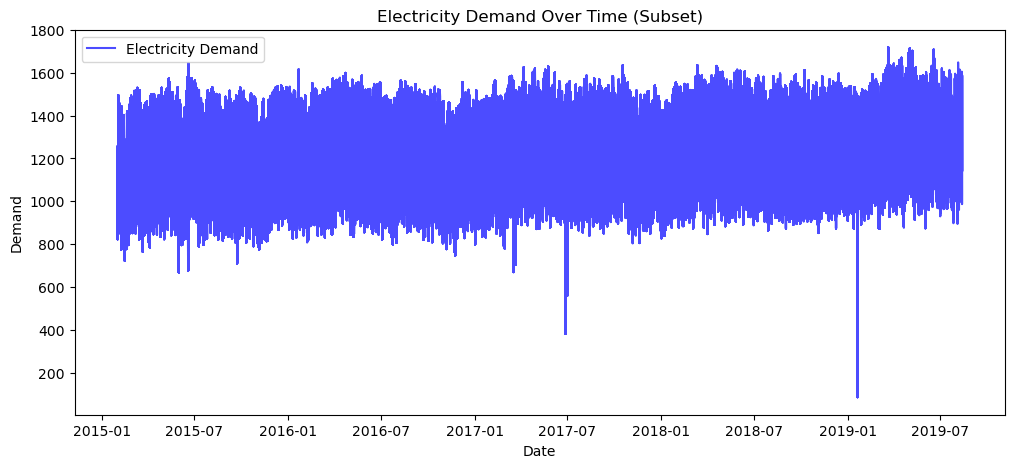

In [5]:
# Plot electricity demand over time
plt.figure(figsize=(12, 5))
plt.plot(df["datetime"], df["DEMAND"], label="Electricity Demand", color="blue", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Electricity Demand Over Time (Subset)")
plt.legend()
plt.show()


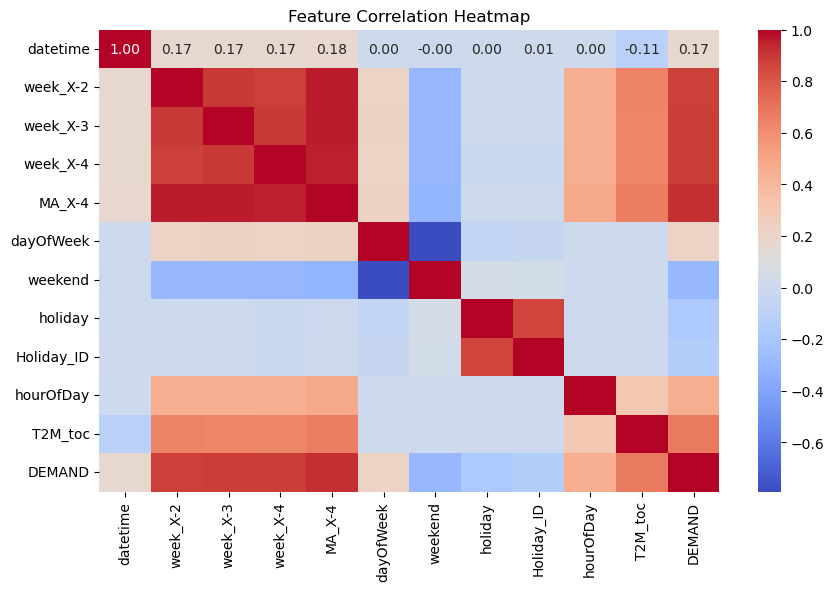

In [6]:
# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


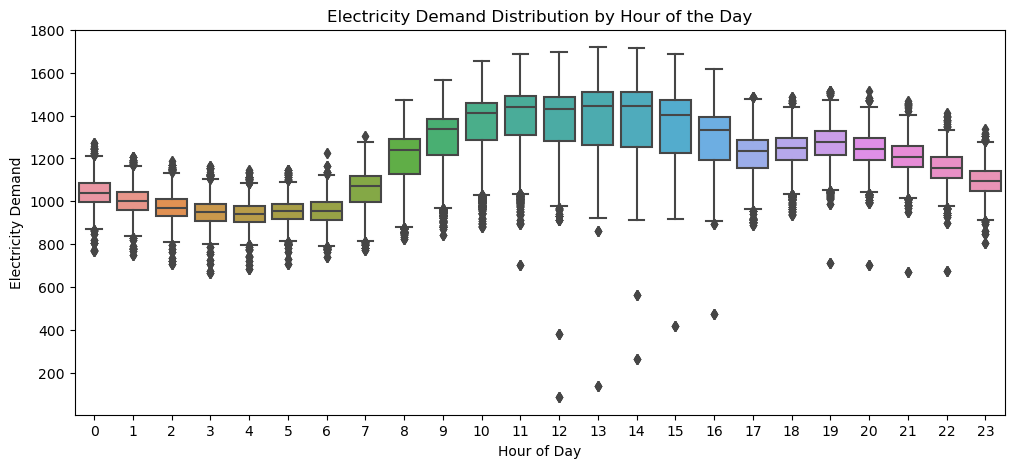

In [7]:
# Boxplot of demand by hour of the day
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["hourOfDay"], y=df["DEMAND"])
plt.xlabel("Hour of Day")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand Distribution by Hour of the Day")
plt.show()


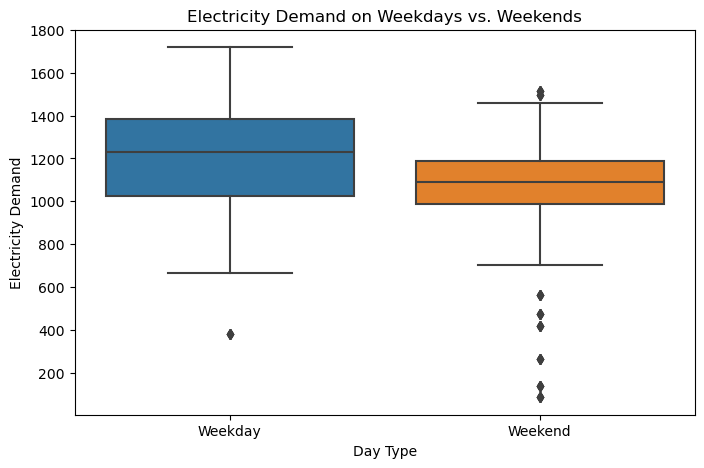

In [8]:
# Boxplot of demand based on weekends vs. weekdays
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["weekend"], y=df["DEMAND"])
plt.xticks(ticks=[0, 1], labels=["Weekday", "Weekend"])
plt.xlabel("Day Type")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand on Weekdays vs. Weekends")
plt.show()


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "data/train_dataframes.xlsx"  # Change this path
xls = pd.ExcelFile(file_path)

# Load selected sheets (first 5 to optimize performance)
selected_sheets = xls.sheet_names[:5]
df_list = [pd.read_excel(xls, sheet_name=sheet) for sheet in selected_sheets]
df = pd.concat(df_list, ignore_index=True)

# Convert datetime column to datetime type
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191496 entries, 2015-01-31 01:00:00 to 2019-08-14 00:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   week_X-2    191496 non-null  float64
 1   week_X-3    191496 non-null  float64
 2   week_X-4    191496 non-null  float64
 3   MA_X-4      191496 non-null  float64
 4   dayOfWeek   191496 non-null  int64  
 5   weekend     191496 non-null  int64  
 6   holiday     191496 non-null  int64  
 7   Holiday_ID  191496 non-null  int64  
 8   hourOfDay   191496 non-null  int64  
 9   T2M_toc     191496 non-null  float64
 10  DEMAND      191496 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 17.5 MB


,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
datetime,,,,,,,,,,,
2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


In [12]:
# Create lag features (previous demand values)
for lag in range(1, 8):  # Lags from 1 to 7 days
    df[f"lag_{lag}"] = df["DEMAND"].shift(lag)

# Create rolling statistics
df["rolling_mean_3"] = df["DEMAND"].rolling(window=3).mean()
df["rolling_mean_7"] = df["DEMAND"].rolling(window=7).mean()

# Time-based features
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month

# Drop NaN values generated by lagging
df.dropna(inplace=True)

# Display updated data
df.head()


,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,...,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_3,rolling_mean_7,hour,dayofweek,month
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-31 08:00:00,1075.3486,1021.6720,1048.9720,1057.194625,1,1,0,0,8,26.980310,...,910.1472,889.0806,903.3637,913.8660,954.2018,979.991800,936.633271,8,5,1
2015-01-31 09:00:00,1116.6425,1108.9439,1167.9074,1138.178750,1,1,0,0,9,28.031824,...,922.1737,910.1472,889.0806,903.3637,913.8660,1065.820600,974.603857,9,5,1
2015-01-31 10:00:00,1121.9048,1165.4756,1257.5069,1189.291375,1,1,0,0,10,28.906061,...,939.9442,922.1737,910.1472,889.0806,903.3637,1170.891500,1024.860029,10,5,1
2015-01-31 11:00:00,1149.2800,1179.0630,1254.5830,1202.799725,1,1,0,0,11,29.555170,...,1077.8575,939.9442,922.1737,910.1472,889.0806,1229.419467,1076.911571,11,5,1
2015-01-31 12:00:00,1124.3282,1173.0899,1216.9004,1176.489125,1,1,0,0,12,30.036523,...,1179.6601,1077.8575,939.9442,922.1737,910.1472,1244.069967,1121.692200,12,5,1


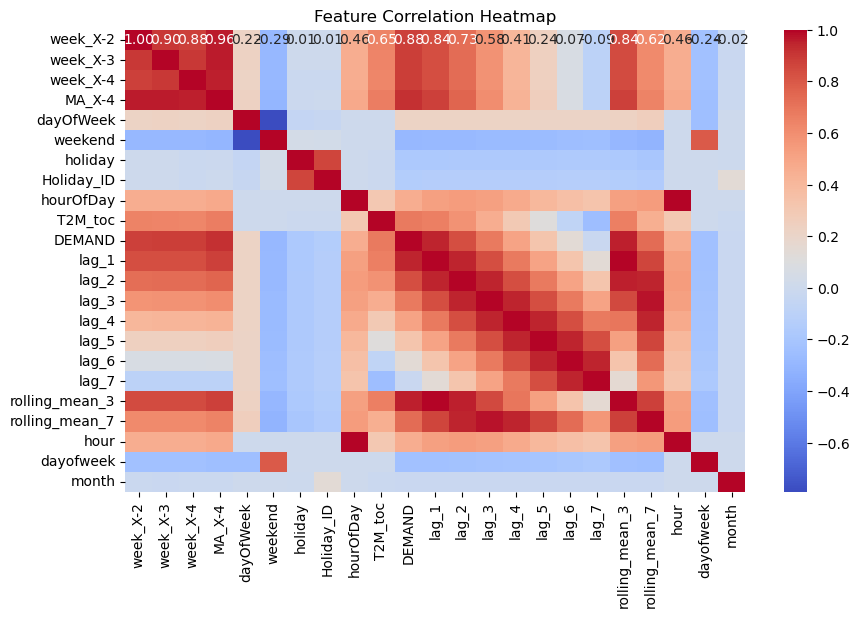

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Select features based on correlation
features = ["lag_1", "lag_2", "lag_3", "rolling_mean_3", "rolling_mean_7", "hour", "dayofweek", "month"]
target = "DEMAND"


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/ana

Mean Absolute Error (MAE): 163.76
Root Mean Squared Error (RMSE): 192.41


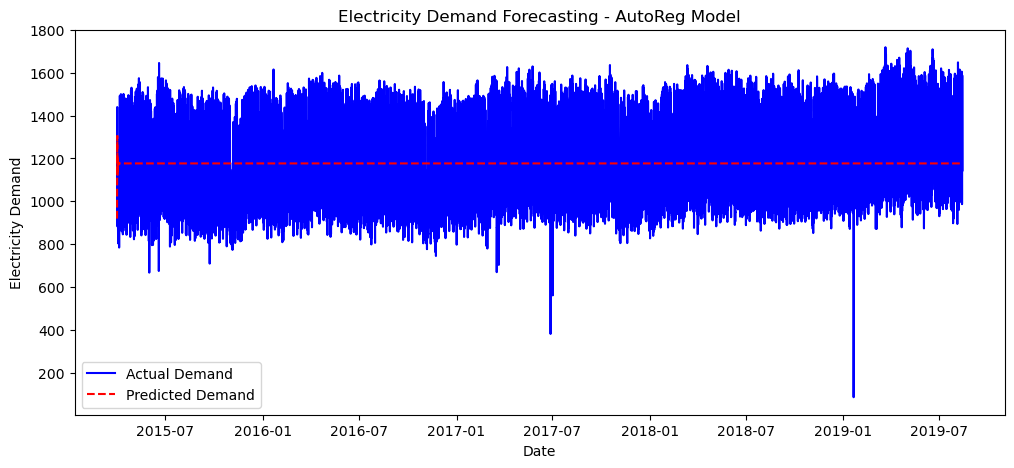

In [14]:
# Split data into train & test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Train the AutoRegressor model
model = AutoReg(train[target], lags=7)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluate the model
mae = mean_absolute_error(test[target], predictions)
rmse = np.sqrt(mean_squared_error(test[target], predictions))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted demand
plt.figure(figsize=(12, 5))
plt.plot(test.index, test[target], label="Actual Demand", color="blue")
plt.plot(test.index, predictions, label="Predicted Demand", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand Forecasting - AutoReg Model")
plt.legend()
plt.show()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "./data/train_dataframes.xlsx"  # Change this path
xls = pd.ExcelFile(file_path)

# Load selected sheets (first 5 to optimize performance)
selected_sheets = xls.sheet_names[:5]
df_list = [pd.read_excel(xls, sheet_name=sheet) for sheet in selected_sheets]
df = pd.concat(df_list, ignore_index=True)

# Convert datetime column to datetime type
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191496 entries, 2015-01-31 01:00:00 to 2019-08-14 00:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   week_X-2    191496 non-null  float64
 1   week_X-3    191496 non-null  float64
 2   week_X-4    191496 non-null  float64
 3   MA_X-4      191496 non-null  float64
 4   dayOfWeek   191496 non-null  int64  
 5   weekend     191496 non-null  int64  
 6   holiday     191496 non-null  int64  
 7   Holiday_ID  191496 non-null  int64  
 8   hourOfDay   191496 non-null  int64  
 9   T2M_toc     191496 non-null  float64
 10  DEMAND      191496 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 17.5 MB


,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
datetime,,,,,,,,,,,
2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


In [18]:
# Create lag features (only selecting the most relevant ones)
df["lag_1"] = df["DEMAND"].shift(1)   # Best predictor based on correlation
df["lag_3"] = df["DEMAND"].shift(3)
df["lag_7"] = df["DEMAND"].shift(7)

# Create rolling statistics (smoothing trends)
df["rolling_mean_7"] = df["DEMAND"].rolling(window=7).mean()

# Time-based features
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek

# Drop NaN values generated by lagging
df.dropna(inplace=True)

# Display updated data
df.head()


,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND,lag_1,lag_3,lag_7,rolling_mean_7,hour,dayofweek
datetime,,,,,,,,,,,,,,,,,
2015-01-31 08:00:00,1075.3486,1021.6720,1048.9720,1057.194625,1,1,0,0,8,26.980310,1077.8575,939.9442,910.1472,954.2018,936.633271,8,5
2015-01-31 09:00:00,1116.6425,1108.9439,1167.9074,1138.178750,1,1,0,0,9,28.031824,1179.6601,1077.8575,922.1737,913.8660,974.603857,9,5
2015-01-31 10:00:00,1121.9048,1165.4756,1257.5069,1189.291375,1,1,0,0,10,28.906061,1255.1569,1179.6601,939.9442,903.3637,1024.860029,10,5
2015-01-31 11:00:00,1149.2800,1179.0630,1254.5830,1202.799725,1,1,0,0,11,29.555170,1253.4414,1255.1569,1077.8575,889.0806,1076.911571,11,5
2015-01-31 12:00:00,1124.3282,1173.0899,1216.9004,1176.489125,1,1,0,0,12,30.036523,1223.6116,1253.4414,1179.6601,910.1472,1121.692200,12,5


In [19]:
# Selected features based on correlation analysis
features = ["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]
target = "DEMAND"

# Split data into train & test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define training & testing sets
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]


In [20]:
# Train the AutoRegressor model with selected features
model = AutoReg(y_train, lags=7)  # Using 7-day lag structure
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/ana

Mean Absolute Error (MAE): 163.76
Root Mean Squared Error (RMSE): 192.41


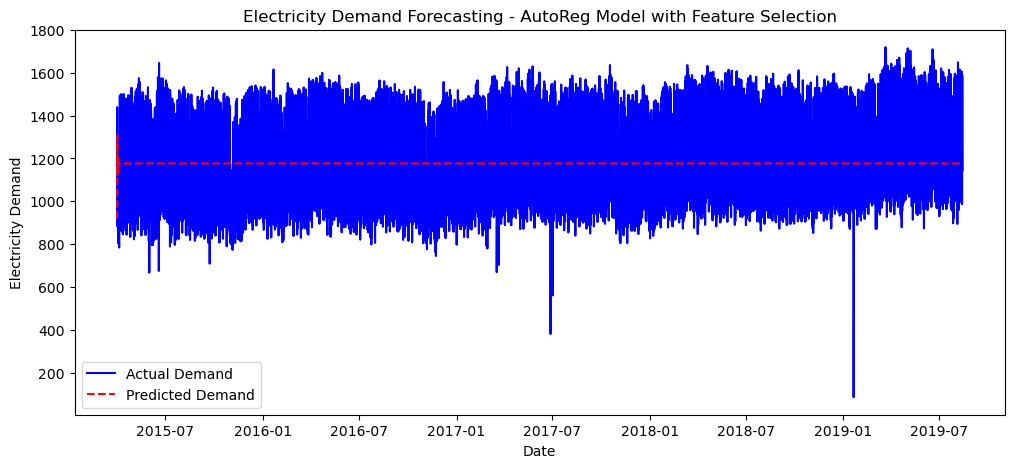

In [21]:
# Plot actual vs predicted demand
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, predictions, label="Predicted Demand", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand Forecasting - AutoReg Model with Feature Selection")
plt.legend()
plt.show()


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
# file_path = "train_dataframes.xlsx"
xls = pd.ExcelFile(file_path)

# Load selected sheets
selected_sheets = xls.sheet_names[:5]
df_list = [pd.read_excel(xls, sheet_name=sheet) for sheet in selected_sheets]
df = pd.concat(df_list, ignore_index=True)

# Convert datetime column to datetime format
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Create Lag & Rolling Features
df["lag_1"] = df["DEMAND"].shift(1)
df["lag_3"] = df["DEMAND"].shift(3)
df["lag_7"] = df["DEMAND"].shift(7)
df["rolling_mean_7"] = df["DEMAND"].rolling(window=7).mean()
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek

# Drop NaN values
df.dropna(inplace=True)

# Define Features & Target
features = ["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]
target = "DEMAND"

# Train-Test Split (80-20)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]


Naive Model MAE: 46.16, RMSE: 60.93


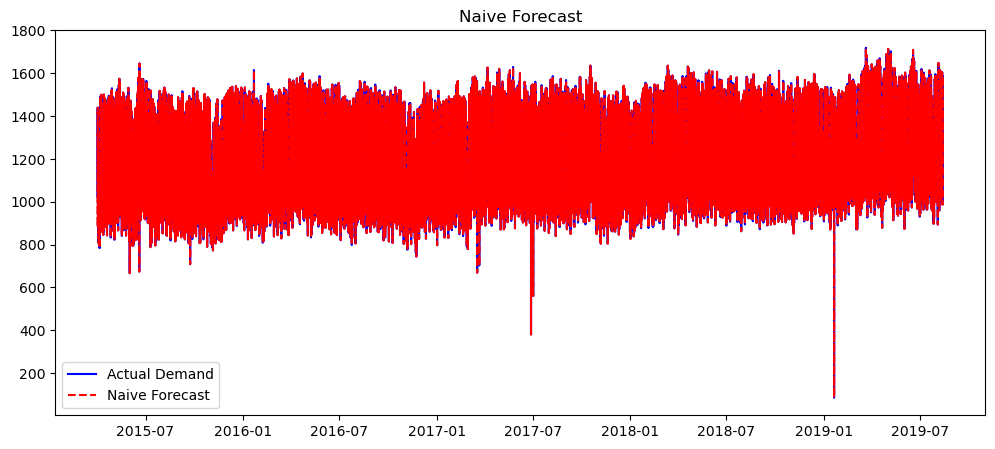

In [23]:
# Naive Forecast (Last known value as prediction)
naive_predictions = test["lag_1"]

# Evaluate
mae = mean_absolute_error(y_test, naive_predictions)
rmse = np.sqrt(mean_squared_error(y_test, naive_predictions))
print(f"Naive Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, naive_predictions, label="Naive Forecast", color="red", linestyle="dashed")
plt.title("Naive Forecast")
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/

ARIMA Model MAE: 298.03, RMSE: 353.02


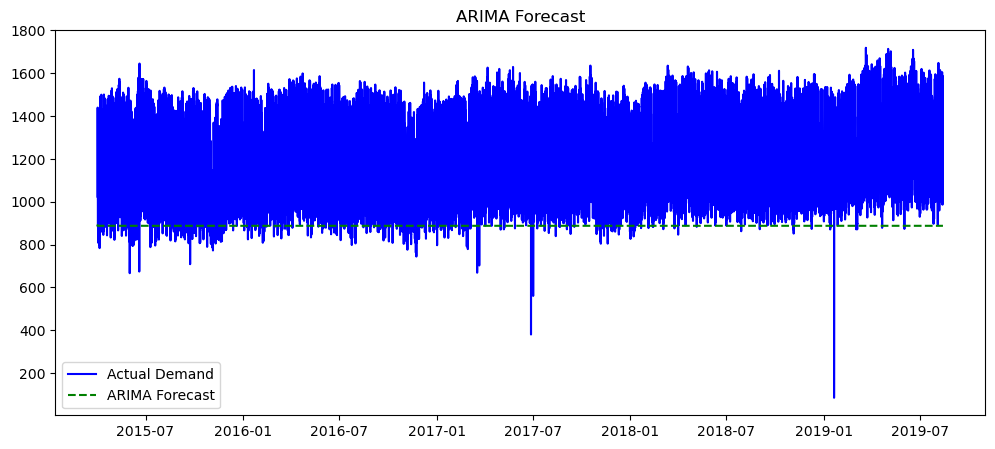

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA Model
arima_model = ARIMA(y_train, order=(5,1,0))
arima_fit = arima_model.fit()

# Predictions
arima_predictions = arima_fit.forecast(steps=len(y_test))

# Evaluate
mae = mean_absolute_error(y_test, arima_predictions)
rmse = np.sqrt(mean_squared_error(y_test, arima_predictions))
print(f"ARIMA Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, arima_predictions, label="ARIMA Forecast", color="green", linestyle="dashed")
plt.title("ARIMA Forecast")
plt.legend()
plt.show()


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA Model
sarima_model = SARIMAX(y_train, order=(3,1,3), seasonal_order=(1,1,1,24))
sarima_fit = sarima_model.fit()

# Predictions
sarima_predictions = sarima_fit.forecast(steps=len(y_test))

# Evaluate
mae = mean_absolute_error(y_test, sarima_predictions)
rmse = np.sqrt(mean_squared_error(y_test, sarima_predictions))
print(f"SARIMA Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, sarima_predictions, label="SARIMA Forecast", color="purple", linestyle="dashed")
plt.title("SARIMA Forecast")
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81903D+00    |proj g|=  3.28578D-01

At iterate    5    f=  4.69882D+00    |proj g|=  5.00902D-02


KeyboardInterrupt: 

In [27]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.4 MB/s eta 0:00:0000:0100:010m


XGBoost Model MAE: 13.09, RMSE: 18.36


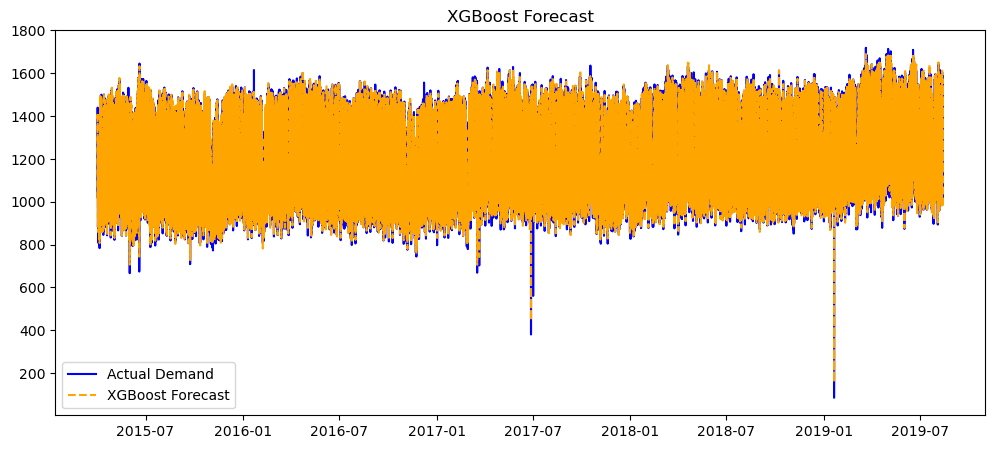

In [28]:
from xgboost import XGBRegressor

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, xgb_predictions)
rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print(f"XGBoost Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, xgb_predictions, label="XGBoost Forecast", color="orange", linestyle="dashed")
plt.title("XGBoost Forecast")
plt.legend()
plt.show()


Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2394/2394 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - loss: 0.0072
Epoch 2/5
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - loss: 0.0015
Epoch 3/5
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 47s 20ms/step - loss: 0.0011
Epoch 4/5
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 50s 21ms/step - loss: 9.9465e-04
Epoch 5/5
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - loss: 9.2685e-04
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
LSTM Model MAE: 41.82, RMSE: 55.77


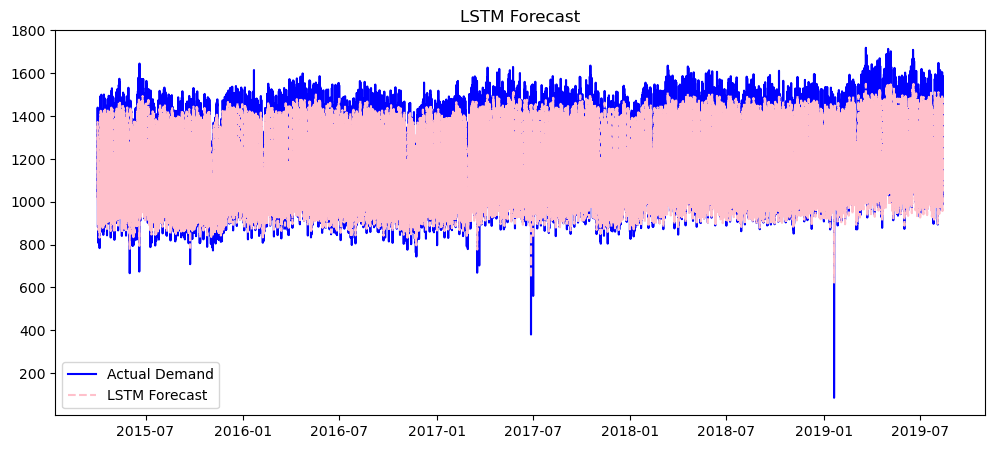

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Normalize Data
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Reshape Data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer="adam", loss="mse")

# Train Model
lstm_model.fit(X_train_lstm, y_train_scaled, epochs=5, batch_size=64, verbose=1)

# Predictions
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions)  # Convert back to original scale

# Evaluate
mae = mean_absolute_error(y_test, lstm_predictions)
rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print(f"LSTM Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, lstm_predictions, label="LSTM Forecast", color="pink", linestyle="dashed")
plt.title("LSTM Forecast")
plt.legend()
plt.show()


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
# file_path = "train_dataframes.xlsx"
xls = pd.ExcelFile(file_path)

# Load selected sheets
selected_sheets = xls.sheet_names[:5]
df_list = [pd.read_excel(xls, sheet_name=sheet) for sheet in selected_sheets]
df = pd.concat(df_list, ignore_index=True)

# Convert datetime column to datetime format
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Create Lag & Rolling Features
df["lag_1"] = df["DEMAND"].shift(1)
df["lag_3"] = df["DEMAND"].shift(3)
df["lag_7"] = df["DEMAND"].shift(7)
df["rolling_mean_7"] = df["DEMAND"].rolling(window=7).mean()
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek

# Drop NaN values
df.dropna(inplace=True)

# Define Features & Target
features = ["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]
target = "DEMAND"

# Train-Test Split (80-20)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]


In [34]:
!pip install prophet

  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 3.4 MB/s eta 0:00:00a 0:00:01
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)


00:20:18 - cmdstanpy - INFO - Chain [1] start processing
00:20:56 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model MAE: 268.56, RMSE: 297.10


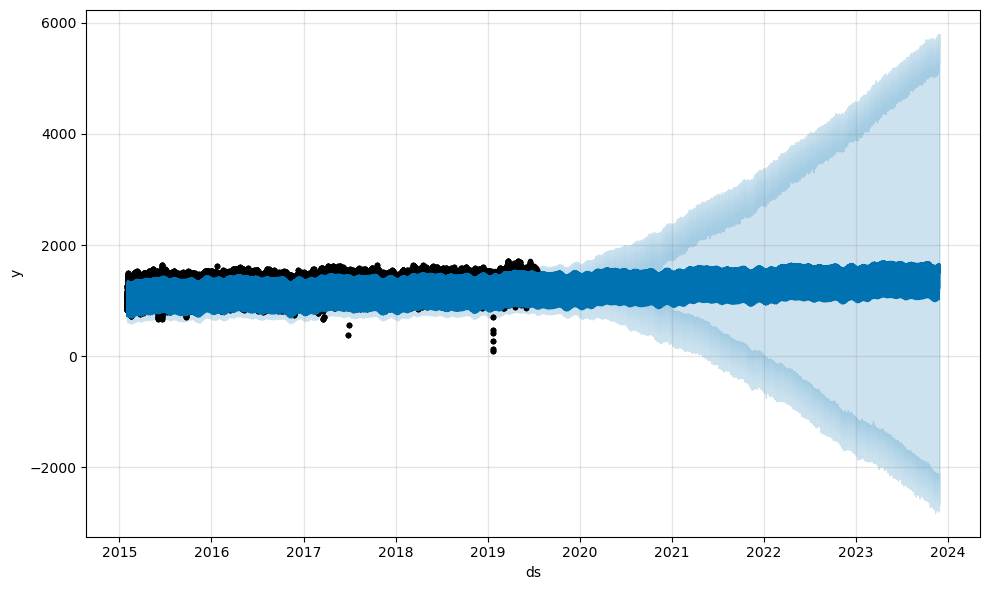

In [35]:
from prophet import Prophet

# Prepare Data for Prophet
prophet_df = df.reset_index()[["datetime", "DEMAND"]].rename(columns={"datetime": "ds", "DEMAND": "y"})

# Train & Test Split
train_prophet = prophet_df.iloc[:train_size]
test_prophet = prophet_df.iloc[train_size:]

# Train Prophet Model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Make Future Predictions
future = prophet_model.make_future_dataframe(periods=len(test), freq='H')
forecast = prophet_model.predict(future)

# Extract Predictions
prophet_predictions = forecast["yhat"].iloc[-len(test):].values

# Evaluate
mae = mean_absolute_error(y_test, prophet_predictions)
rmse = np.sqrt(mean_squared_error(y_test, prophet_predictions))
print(f"Prophet Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
prophet_model.plot(forecast)
plt.show()


In [37]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.7 MB/s eta 0:00:0000:0100:01


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 153191, number of used features: 6
[LightGBM] [Info] Start training from score 1176.609996
LightGBM Model MAE: 12.78, RMSE: 18.15


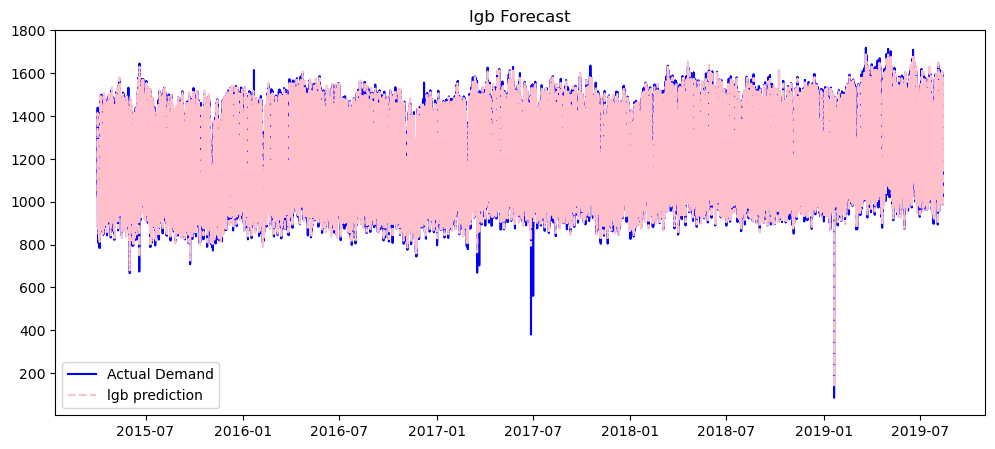

In [46]:
import lightgbm as lgb

# Train LightGBM Model
lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.05, max_depth=7)
lgb_model.fit(X_train, y_train)

# Predictions
lgb_predictions = lgb_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, lgb_predictions)
rmse = np.sqrt(mean_squared_error(y_test, lgb_predictions))
print(f"LightGBM Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")
# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, lgb_predictions, label="lgb prediction", color="pink", linestyle="dashed")
plt.title("lgb Forecast")
plt.legend()
plt.show()


Random Forest Model MAE: 12.32, RMSE: 17.01


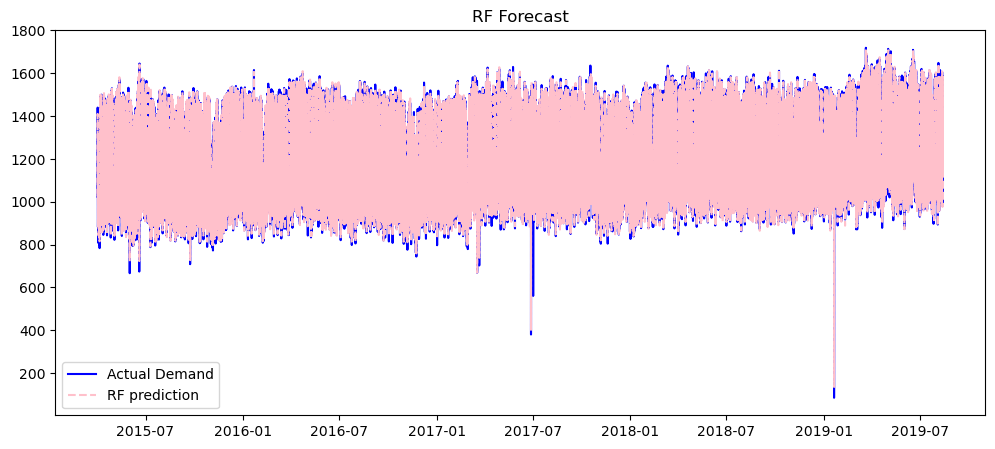

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, rf_predictions)
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")
# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, rf_predictions, label="RF prediction", color="pink", linestyle="dashed")
plt.title("RF Forecast")
plt.legend()
plt.show()

In [45]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.1/27.1 MB 6.2 MB/s eta 0:00:0000:0100:01


CatBoost Model MAE: 14.26, RMSE: 20.24


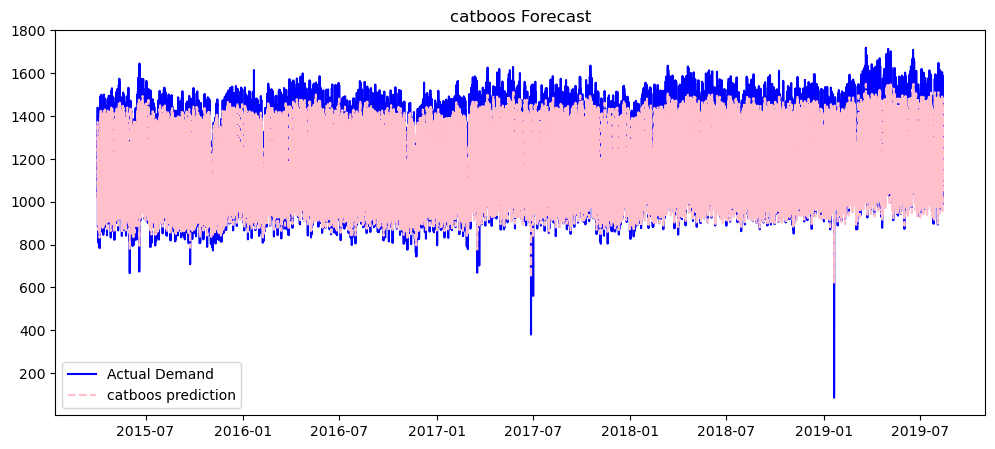

In [48]:
from catboost import CatBoostRegressor

# Train CatBoost Model
catboost_model = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, verbose=0)
catboost_model.fit(X_train, y_train)

# Predictions
catboost_predictions = catboost_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, catboost_predictions)
rmse = np.sqrt(mean_squared_error(y_test, catboost_predictions))
print(f"CatBoost Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")
# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, lstm_predictions, label="catboos prediction", color="pink", linestyle="dashed")
plt.title("catboos Forecast")
plt.legend()
plt.show()


Gradient Boosting Model MAE: 12.84, RMSE: 17.95


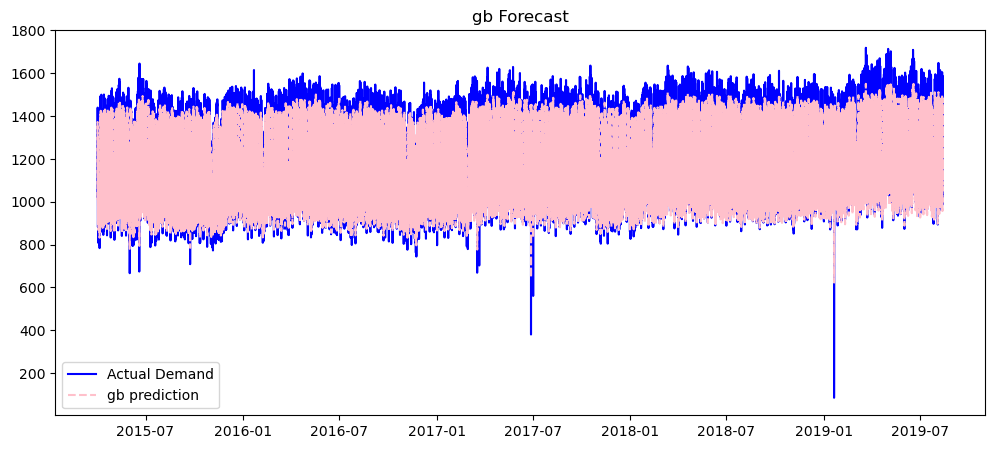

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
gb_model.fit(X_train, y_train)

# Predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, gb_predictions)
rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
print(f"Gradient Boosting Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")
# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, lstm_predictions, label="gb prediction", color="pink", linestyle="dashed")
plt.title("gb Forecast")
plt.legend()
plt.show()


In [51]:
!pip install pytorch_forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 2.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 2.8 MB/s eta 0:00:0000:0100:01


In [52]:
from pytorch_forecasting.models.temporal_fusion_transformer import TemporalFusionTransformer
from pytorch_forecasting.data.timeseries import TimeSeriesDataSet
import torch

# Prepare Data for TFT
df["group"] = 0  # Single group for time series
df_tft = df.reset_index()

# Define TimeSeries Dataset for PyTorch Forecasting
max_prediction_length = len(test)
max_encoder_length = len(train)

training = TimeSeriesDataSet(
    df_tft,
    time_idx="datetime",
    target="DEMAND",
    group_ids=["group"],
    time_varying_known_reals=["hour", "dayofweek"],
    time_varying_unknown_reals=["DEMAND"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
)

# Load Data into PyTorch DataLoader
train_dataloader = training.to_dataloader(train=True, batch_size=32)
test_dataloader = training.to_dataloader(train=False, batch_size=32)

# Initialize TFT Model
tft = TemporalFusionTransformer.from_dataset(training, learning_rate=0.03, hidden_size=16, attention_head_size=4, dropout=0.1)

# Train Model
trainer = pl.Trainer(max_epochs=10)
trainer.fit(tft, train_dataloader)

# Predict
tft_predictions = trainer.predict(tft, test_dataloader)

# Evaluate
mae = mean_absolute_error(y_test, tft_predictions)
rmse = np.sqrt(mean_squared_error(y_test, tft_predictions))
print(f"TFT Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")
# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, lstm_predictions, label="gb prediction", color="pink", linestyle="dashed")
plt.title("gb Forecast")
plt.legend()
plt.show()


AssertionError: Timeseries index should be of type integer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
file_path = "train_dataframes.xlsx"
df = pd.read_excel(file_path)

# Convert datetime column to datetime format
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Feature Engineering
df["lag_1"] = df["DEMAND"].shift(1)
df["lag_3"] = df["DEMAND"].shift(3)
df["lag_7"] = df["DEMAND"].shift(7)
df["rolling_mean_7"] = df["DEMAND"].rolling(window=7).mean()
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek

# Drop NaN values
df.dropna(inplace=True)

# Normalize Data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Train-Test Split (80-20)
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled.iloc[:train_size], df_scaled.iloc[train_size:]

# Convert Data into PyTorch Tensors
X_train = torch.tensor(train[["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]].values, dtype=torch.float32)
y_train = torch.tensor(train["DEMAND"].values, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(test[["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]].values, dtype=torch.float32)
y_test = torch.tensor(test["DEMAND"].values, dtype=torch.float32).unsqueeze(1)

# Reshape for LSTMs/GRUs (batch_size, seq_length, features)
X_train_seq = X_train.view(X_train.shape[0], 1, X_train.shape[1])
X_test_seq = X_test.view(X_test.shape[0], 1, X_test.shape[1])


In [55]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
file_path = "data/train_dataframes.xlsx"
df = pd.read_excel(file_path)

# Convert datetime column to datetime format
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Feature Engineering
df["lag_1"] = df["DEMAND"].shift(1)
df["lag_3"] = df["DEMAND"].shift(3)
df["lag_7"] = df["DEMAND"].shift(7)
df["rolling_mean_7"] = df["DEMAND"].rolling(window=7).mean()
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek

# Drop NaN values
df.dropna(inplace=True)

# Normalize Data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Train-Test Split (80-20)
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled.iloc[:train_size], df_scaled.iloc[train_size:]

# Convert Data into PyTorch Tensors
X_train = torch.tensor(train[["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]].values, dtype=torch.float32)
y_train = torch.tensor(train["DEMAND"].values, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(test[["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]].values, dtype=torch.float32)
y_test = torch.tensor(test["DEMAND"].values, dtype=torch.float32).unsqueeze(1)

# Reshape for LSTMs/GRUs (batch_size, seq_length, features)
X_train_seq = X_train.view(X_train.shape[0], 1, X_train.shape[1])
X_test_seq = X_test.view(X_test.shape[0], 1, X_test.shape[1])


In [56]:
class CNNLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(CNNLSTM, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=2, stride=1)
        self.lstm = nn.LSTM(32, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x, _ = self.lstm(x)
        return self.fc(x[:, -1, :])

cnn_lstm = CNNLSTM(input_size=6, hidden_size=64, num_layers=2)
optimizer = torch.optim.Adam(cnn_lstm.parameters(), lr=0.01)

for epoch in range(50):
    optimizer.zero_grad()
    output = cnn_lstm(X_train_seq)
    loss = nn.MSELoss()(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

cnn_lstm_predictions = cnn_lstm(X_test_seq).detach().numpy()
print(f"CNN-LSTM MAE: {mean_absolute_error(y_test, cnn_lstm_predictions):.2f}")


In [ ]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_dim, 1, bias=False)

    def forward(self, x):
        attn_weights = torch.softmax(self.attn(x), dim=1)
        return torch.sum(x * attn_weights, dim=1)

class LSTMAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMAttention, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.attn = Attention(hidden_size)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attn_out = self.attn(lstm_out)
        return self.fc(attn_out)

lstm_attn = LSTMAttention(input_size=6, hidden_size=64, num_layers=2)
optimizer = torch.optim.Adam(lstm_attn.parameters(), lr=0.01)

for epoch in range(50):
    optimizer.zero_grad()
    output = lstm_attn(X_train_seq)
    loss = nn.MSELoss()(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

lstm_attn_predictions = lstm_attn(X_test_seq).detach().numpy()
print(f"LSTM-Attention MAE: {mean_absolute_error(y_test, lstm_attn_predictions):.2f}")


In [ ]:
from transformers import TimeSeriesTransformerForPrediction

class TransformerLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(TransformerLSTM, self).__init__()
        self.transformer = TimeSeriesTransformerForPrediction.from_pretrained("huggingface/timeseries-transformer")
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.transformer(x)
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

trans_lstm = TransformerLSTM(input_size=6, hidden_size=64, num_layers=2)
optimizer = torch.optim.Adam(trans_lstm.parameters(), lr=0.01)

for epoch in range(50):
    optimizer.zero_grad()
    output = trans_lstm(X_train_seq)
    loss = nn.MSELoss()(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

trans_lstm_predictions = trans_lstm(X_test_seq).detach().numpy()
print(f"Transformer-LSTM MAE: {mean_absolute_error(y_test, trans_lstm_predictions):.2f}")


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA Model
arima_model = ARIMA(train["DEMAND"], order=(5, 1, 0)).fit()
arima_preds = arima_model.forecast(len(test))

# Train LSTM Model
lstm_preds = lstm_attn(X_test_seq).detach().numpy()

# Combine ARIMA & LSTM Predictions (Weighted)
hybrid_preds = (0.6 * arima_preds) + (0.4 * lstm_preds.flatten())

print(f"LSTM-ARIMA Hybrid MAE: {mean_absolute_error(y_test, hybrid_preds):.2f}")
